# Lesson1 手書き文字認識をしよう（ニューラルネットワーク入門）

## 目次

- 3.4の解答
- Section4 実装②
  - 4.1 Fashion MNIST
  - 4.2 実装

## 3.4の解答

1. 損失関数のパラメータ微分のことを何というか  
  ①スケーリング　**②勾配**　③学習率　④SGD
2. 活性化関数の選択により対処可能な問題を何というか  
  **①勾配消失問題**　②次元の呪い　③固有値問題　④バイアス―バリアンストレードオフ
3. 損失関数にペナルティ項を加え、パラメータの自由度を下げる手法を何というか  
  ①モーメンタム　②部分空間法　**③正則化**　④誤差逆伝播法
4. 過学習への対処としてふさわしくないものはどれか  
  ①ドロップアウト　**②スケーリング**　③ElasticNet　④早期終了

## Section4 実装②

最後に、この章の復習として、ファッションデータの分類をMLPを用いて行ってみましょう。

### 4.1 Fashion MNIST

In [2]:
# データのロード
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# データセットの大きさ確認
print(x_train.shape) # 訓練データのサイズ
print(x_test.shape) # テストデータのサイズ

(60000, 28, 28)
(10000, 28, 28)


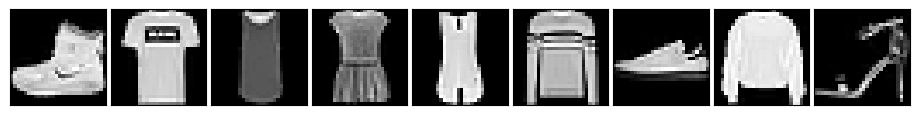

In [4]:
# データセットの表示
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

### 4.2 実装

In [5]:
# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) /255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# モデル構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()

model.add(Dense(512, input_shape=(784,), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 比較用にsection2と類似のモデルを準備
model0 = Sequential()

model0.add(Dense(units=256, input_shape=(784,)))
model0.add(Activation('relu'))
model0.add(Dense(units=100))
model0.add(Activation('relu'))
model0.add(Dense(units=10))
model0.add(Activation('softmax'))

model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

2024-07-29 17:51:06.806271: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# 学習
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])
model0.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
60/60 - 2s - loss: 0.8765 - accuracy: 0.6887 - val_loss: 0.5107 - val_accuracy: 0.8181 - 2s/epoch - 30ms/step
Epoch 2/10
60/60 - 1s - loss: 0.4709 - accuracy: 0.8348 - val_loss: 0.4392 - val_accuracy: 0.8442 - 1s/epoch - 20ms/step
Epoch 3/10
60/60 - 1s - loss: 0.4031 - accuracy: 0.8558 - val_loss: 0.3992 - val_accuracy: 0.8559 - 1s/epoch - 20ms/step
Epoch 4/10
60/60 - 1s - loss: 0.3701 - accuracy: 0.8669 - val_loss: 0.3674 - val_accuracy: 0.8675 - 1s/epoch - 21ms/step
Epoch 5/10
60/60 - 1s - loss: 0.3401 - accuracy: 0.8768 - val_loss: 0.3562 - val_accuracy: 0.8723 - 1s/epoch - 21ms/step
Epoch 6/10
60/60 - 1s - loss: 0.3194 - accuracy: 0.8838 - val_loss: 0.3573 - val_accuracy: 0.8712 - 1s/epoch - 20ms/step
Epoch 7/10
60/60 - 1s - loss: 0.3096 - accuracy: 0.8888 - val_loss: 0.3456 - val_accuracy: 0.8761 - 1s/epoch - 21ms/step
Epoch 8/10
60/60 - 1s - loss: 0.2898 - accuracy: 0.8941 - val_loss: 0.3537 - val_accuracy: 0.8718 - 1s/epoch - 20ms/step
Epoch 9/10
60/60 - 1s - loss: 0.

In [8]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score0 = model0.evaluate(x_test, y_test, verbose=0)
print('Test loss by model0:', score0[0])
print('Test accuracy by model0:', score0[1])

Test loss: 0.322743684053421
Test accuracy: 0.883899986743927
Test loss by model0: 0.6644480228424072
Test accuracy by model0: 0.7803000211715698
